# 1.1 Import Data
The dataset for this analysis can be found on kaggle here and the original dataset with descriptions is found here.

Per the original authors request, their information is as follows:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi
M.D. 2. University Hospital, Zurich, Switzerland: William Steinbrunn
M.D. 3. University Hospital, Basel, Switzerland: Matthias Pfisterer
M.D. 4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

This dataset contains only the patients from Cleveland.

'Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others.

The term "heart disease" is often used interchangeably with the term "cardiovascular disease." Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart's muscle, valves or rhythm, also are considered forms of heart disease.'

Heart disease involves a reduction in blood flow to the heart muscles due to blockages in the arteries of the heart, called atherosclerosis, which are commonly caused by a build-up of plaque (also known as atheroma). The main symptoms are chest pain (angina), heart attacks and heart failure, though no symptoms is also common. The risk of having atherosclerosis is increased if you smoke, regularly drink excessive amounts of alcohol and have underlying conditions such as high blood pressure, high cholesterol or diabetes.

Having a machine learning model that can predict if a patient has or does not have heart disease could potentially save time in diagnosing the patient and may reduce the likelihood of a misclassification when used in conjunction with the doctor. This analysis will look at six different machine learning techniques.



Complete attribute documentation:

1. age: age in years

2. sex: sex (1 = male; 0 = female)

3. cp: chest pain type

-- Value 1: typical angina (Typical (classic) angina chest pain consists of
(a) Substernal chest pain or discomfort that is 
(b) Provoked by exertion or emotional stress and 
(c) relieved by rest or nitroglycerine (or both).

-- Value 2: atypical angina (Atypical (probable) angina chest pain applies when 2 out of 3 criteria of classic angina are present.)

-- Value 3: non-anginal pain

-- Value 4: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy

13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14. num: diagnosis of heart disease (angiographic disease status)

-- Value 0: < 50% diameter narrowing 

-- Value 1: > 50% diameter narrowing
(in any major blood vessel)



More information on the dataset here:

<a href="https://archive.ics.uci.edu/ml/datasets/Heart+Disease">More info</a>

The authors of the databases have requested:

      ...that any publications resulting from the use of the data include the 
      names of the principal investigator responsible for the data collection
      at each institution.  They would be:

       1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
       2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
       3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
       4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:
	  Robert Detrano, M.D., Ph.D.


# Import data

In [5]:
### Import necessary libraries & packages ###
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

# Our custom functions #
%run clf_functions.ipynb

ERROR:root:File `'clf_functions.ipynb.py'` not found.


In [ ]:
data_heart=pd.read_csv('heart.csv')
data_heart.columns

In [ ]:
data=pd.read_csv('processed.cleveland.csv')
data.head()

In [ ]:
#Get the column names from heart.csv
data.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data.head()

In [ ]:
data.info()

Our target column indicatets if the person is sick or not.

-- Value 0: < 50% diameter narrowing - It means that there is less than 50% narrowing of the artery, therefore no heart disease.
-- Value 1: > 50% diameter narrowing - There is a more than 50% narrowing of a major blood vessel, therefore heart disease is pressent.

0 - no heart disease
1 - heart disease

# Data cleaning

In [2]:
#Check for values that are not numbers.
data.isna().any()

NameError: name 'data' is not defined

In [3]:
#Check Dataframe for duplicate rows
duplicateRowsData = data[data.duplicated()]
print(duplicateRowsData)

NameError: name 'data' is not defined

In the details on the database the authors specify that there are values missing and they replaced them with -9.0.
Let's see if the non-values are still in the set.

In [ ]:
#Check if there is any value equal to -9.0
data.where(data == -9.0).sum()

Therefore no non-values present.

In [ ]:
# Function that will find the number of unique values and tell us if it's high or low.
def find_number_unique_values(df):
    #Creates two empty lists for categorical and continuous data
    cont_val=[]
    cat_val=[]
    bool_val =[]
    #Adds column to categorical data list if it has less than 5 unique values or adds it to the continuous data list it it has more than 5 unique values.
    for i in df.columns:
        if df[i].nunique()>6:
            cont_val.append(i)
        elif 2 < df[i].nunique()<6:
            cat_val.append(i)
        else:
            bool_val.append(i)
    return cont_val, cat_val, bool_val
    print(f" categorical values - {cat_val}.")
    print(f" continuous values - {cont_val}.")
    print(f" boolean values - {bool_val}.")  

In [ ]:
find_number_unique_values(data)

# Data analysis 

# Categorical and Boolean data 

# Target 
0 - no heart disease
1,2,3,4 - heart disease

In [ ]:
data['target'].value_counts(normalize=True)

In [ ]:
data.target = data.target.replace({2:1, 3:1, 4:1})

In [ ]:
data['target'].value_counts(normalize=True)

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No Heart Disease', 'Heart Disease'
sizes = [54, 46]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Exercised Induced Angina

1 - present

0 - absent

In [ ]:
data.exang.value_counts()

In [ ]:
ct = pd.crosstab(data.exang, data.target)
ct.plot.bar()
plt.xlabel('Exercised Induced Angina ', fontsize = 15)
plt.ylabel('Number of pacients', fontsize = 15)
plt.title('Exercised Induced Angina VS Heart Disease', fontsize = 15)
fbs_ticks = ['Chest Pain Absent', 'Chest Pain Present']
plt.xticks([0, 1], fbs_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

Ecercised induced angina is due to narrowing of blood vessels which is one of the definitions of heart disease.

# SEX
- 1 for male
- 0 for female

In [ ]:
data['sex'].value_counts()

In [ ]:
data['sex'].describe()

In [ ]:
ct = pd.crosstab(data.sex, data.target)
ct.plot.bar()
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Number of pacients', fontsize = 15)
plt.title('Gender VS Heart Disease', fontsize = 15)
gender_ticks = ['Female', 'Male']
plt.xticks([0, 1], gender_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

# Chest Pain

-- Value 1: typical angina (Typical (classic) angina chest pain consists of
(a) Substernal chest pain or discomfort that is 
(b) Provoked by exertion or emotional stress and 
(c) relieved by rest or nitroglycerine (or both).

-- Value 2: atypical angina (Atypical (probable) angina chest pain applies when 2 out of 3 criteria of classic angina are present.)

-- Value 3: non-anginal pain

-- Value 4: asymptomatic



In [ ]:
data['cp'].value_counts()

In [ ]:
sns.barplot(x=data.cp.value_counts().index, y=data.cp.value_counts().values)
plt.xlabel('Chest pain type')
plt.ylabel('Chest pain type counter')
plt.title('Chest Pain Analysis System')
plt.show()

In [ ]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="sex", y="cp",hue='target',
              palette=["c", "r", "y"], data=data)
plt.show()

In [ ]:
ct = pd.crosstab(data.cp, data.target)
ct.plot.bar()
# Create an array with the colors you want to use
colors = [  "#099441","#B3000C" ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plt.xlabel('Chest Pain Type', fontsize = 15)
plt.ylabel('Number of pacients', fontsize = 15)
plt.title('Chest Pain VS Heart Disease', fontsize = 15)
gender_ticks = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'A-symptomatic ']
plt.xticks([0, 1, 2, 3], gender_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

If we examine the plot, we can conclude that the absence of chest pain is not a good indicator of the absence of heart disease. 

# Fasting Blood Sugar
Fasting Blood Sugar > 120 mg/dl - 1 

Fasting Blood Sugar < 120 mg/dl - 0

"Study shows a fasting BG of above 100 increases risk of heart disease by 300%. >People with a fasting blood sugar level of 100-125 mg/dl had an adjusted nearly 300% increase higher risk of having coronary heart disease than people with a level below 79 mg/dl."

See more info on this matter:
<a href="http://www.diabetesincontrol.com/fasting-blood-sugar-above-90-puts-you-at-risk-of-heart-disease/">Here</a>

In [ ]:
data['fbs'].value_counts()

In [ ]:
sns.barplot(x=data.fbs.value_counts().index, y=data.fbs.value_counts().values)
# Create an array with the colors you want to use
colors = [  "#099441","#B30040" ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plt.xlabel('Fasting Blood Sugar ')
plt.ylabel('Fasting Blood Sugar counter')
plt.title('Fasting Blood Sugar Analysis System')
plt.show()

In [ ]:
ct = pd.crosstab(data.fbs, data.target)
ct.plot.bar()
# Create an array with the colors you want to use
colors = [  "#099441","#B3000C" ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plt.xlabel('Fasting Blood Sugar ', fontsize = 15)
plt.ylabel('Number of people', fontsize = 15)
plt.title('Fasting Blood Sugar VS Heart Disease', fontsize = 15)
fbs_ticks = ['Fasting Blood Sugar < 120 mg/dl', 'Fasting Blood Sugar > 120 mg/dl ']
plt.xticks([0, 1], fbs_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

# RESTECG
Resting Electrocardiographic Results 

 Value 0: normal 

 Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 

 Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [ ]:
data.restecg.value_counts()

In [ ]:
ct = pd.crosstab(data.restecg, data.target)
ct.plot.bar()
# Create an array with the colors you want to use
colors = [  "#099441","#B3000C" ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plt.xlabel('Resting Electrocardiographic Results ', fontsize = 15)
plt.ylabel('Number of people', fontsize = 15)
plt.title('Resting Electrocardiographic Results VS Heart Disease', fontsize = 15)
fbs_ticks = ['Normal', 'ST-T wave abnormality ','Left ventricular hypertrophy']
plt.xticks([0, 1, 2], fbs_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

# SLOPE

slope: the slope of the peak exercise ST segment

-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

The J point (the point of inflection at the junction of the S wave and ST segment) becomes depressed during exercise, with maximum depression at peak exercise. The normal ST segment during exercise therefore slopes sharply upwards.
The standard criterion for an abnormal ST segment response is horizontal (planar) or downsloping depression of >1 mm. If 0.5 mm of depression is taken as the standard, the sensitivity of the test increases and the specificity decreases (vice versa if 2 mm of depression is selected as the standard).
A test that indicates a high probability of coronary artery disease is one in which there is substantial ST depression at low work rate associated with typical angina-like pain and a drop in blood pressure. Deeper and more widespread ST depression generally indicates more severe or extensive disease.

False positive results are common in women, reflecting the lower incidence of coronary artery disease in this group.

I found the following info here :https://www.kaggle.com/ronitf/heart-disease-uci/discussion/151898
These one-liners didn't seem like enough to make a useful and interpretable model. Without a better understanding of the data, it would be difficult to act on the information or to trust the results.

The restecg, slope and oldpeak fields all relate to findings from an electrocardiogram. The graphic shows the components of a normal ECG which measures voltage over time in the heart muscle. restecg is used to look for 2 specific abnormalities in the resting ECG, while slope and oldpeak are both based on comparisons of the resting ECG and the ECG while excercising.

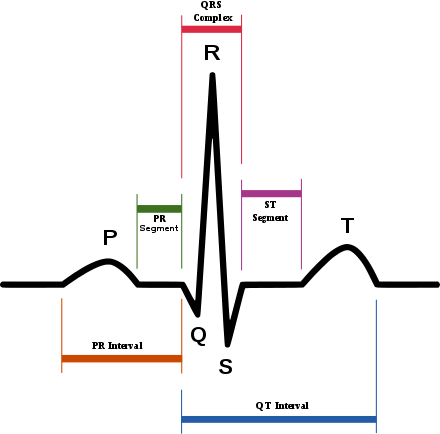

In the graphic, the ST segment is labeled and shown to be flat. The slope relates whether there is an abnormality in the shape of the ST segment (still hard to say what the difference between 1 = unsloping and 2 = flat could be). Old peak is a measure of the depression occurring in the ST segment (mm). A value greater than 0.5mm indicates a weakened heart and an increased risk of cardiac events such as heart attack. ST depression is also associated with angina, another variable in the data.

In [ ]:
data.slope.value_counts()

In [ ]:
ct = pd.crosstab(data.slope, data.target)
ct.plot.bar()
# Create an array with the colors you want to use
colors = [  "#099441","#B3000C" ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plt.xlabel('Exercise tolerance testing ', fontsize = 15)
plt.ylabel('Number of pacients', fontsize = 15)
plt.title('Exercise tolerance testing VS Heart Disease', fontsize = 15)
fbs_ticks = ['Upsloping', 'Flat ','Downsloping']
plt.xticks([0, 1, 2], fbs_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

# CA
Number of major vessels (0-3) colored by flourosopy

In [ ]:
data.ca.value_counts()

In [ ]:
data[data['ca']=='?']

In [ ]:
#Drop rows with ca = ?.
data = data[data['ca']!='?']

In [ ]:
ct = pd.crosstab(data.ca, data.target)
ct.plot.bar()
# Create an array with the colors you want to use
colors = [  "#099441","#B3000C" ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plt.xlabel('Number of Coronary Arteries ', fontsize = 15)
plt.ylabel('Number of pacients', fontsize = 15)
plt.title('Number of Coronary Arteries VS Heart Disease', fontsize = 15)
fbs_ticks = ['0', '1 ','2','3']
plt.xticks([0, 1, 2,3], fbs_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

# THAL

3 = normal; 

6 = fixed defect; 

7 = reversable defect

Thalassemia is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen. Thalassemia can cause anemia, leaving you fatigued. If you have mild thalassemia, you might not need treatment.


In [ ]:
data.thal.value_counts()

In [ ]:
data = data[data['thal']!= '?']

In [ ]:
data.thal.value_counts()

In [ ]:
ct = pd.crosstab(data.thal, data.target)
ct.plot.bar()
# Create an array with the colors you want to use
colors = [  "#099441","#B3000C" ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plt.xlabel('Thalassemia ', fontsize = 15)
plt.ylabel('Number of pacients', fontsize = 15)
plt.title('Thalassemia VS Heart Disease', fontsize = 15)
fbs_ticks = ['3 - Normal', '6 - Fixed Defect','7 - Reversable Defect']
plt.xticks([0, 1, 2], fbs_ticks, rotation = 10, fontsize = 12)
L = plt.legend()
L.get_texts()[1].set_text('Heart Disease')
L.get_texts()[0].set_text('No Heart Disease')

In [ ]:
data.cp = pd.Categorical(data.cp)
data.slope = pd.Categorical(data.slope)
data.restecg = pd.Categorical(data.restecg)
data.ca=pd.Categorical(data.ca)
data.thal=pd.Categorical(data.thal)

In [ ]:
#Separate categorical columns from the others.
categ_cols=['cp', 'slope', 'restecg', 'ca', 'thal']

In [ ]:
categ_dummy_data= pd.get_dummies(data[categ_cols], drop_first=True)
categ_dummy_data.head()

# CONTINUOUS VARIABLES

# Remove outliers.
Remove outliers in all the features using a function I found here: https://github.com/nadinezab/kc-house-prices-prediction/blob/master/kc-house-prices.ipynb

In [ ]:
# Define function to remove outliers
def remove_outliers(df):
    '''removes entries with z-score above specific columns'''
    variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [ ]:
data1 = remove_outliers(data)
len(data1)

In [ ]:
loss=100-(len(data1)*100)/len(data)
print(f"We lost {round(loss,2)}% of our data.")

# Age

In [ ]:
data1.age.describe()

In [ ]:
# Create an array with the colors you want to use
colors = [ "#099441", "#B3000C", ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.boxplot(x='target',y='age',data=data1)

It seems that the incidence of heart disease increases with age. 

In [ ]:
# Scatter plot of latitude vs longitude with hue price.
sns.swarmplot(x = data1['sex'], y = data1['age'], hue = data1['target'], data = data1)
plt.title('Gender & Age VS Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Age')
# Create an array with the colors you want to use
colors = [ "#B3000C", "#099441"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plt.show()

It seems that gender makes a diffrence when the pacient is young. In older pacients women also have a high incidence of heart disease.

This hypothesis is supported by scientific research:


"Recent data from the National Health and Nutrition Examination Surveys (NHANES) have shown that over the past two decades the prevalence of myocardial infarctions has increased in midlife (35 to 54 years) women, while declining in similarly aged men. In a report from the European Heart Survey on stable angina pectoris it was found that women are less likely to be referred for functional testing for ischaemia and that a lower rate of diagnostic angiograms and interventional procedures are performed compared with men."


See more info on this matter:
<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3018605/">More info</a>

# TRESTBPS

Resting blood pressure (in mm Hg on admission to the hospital)

In [ ]:
data1.trestbps.describe()

In [ ]:
colors = [ "#099441", "#B3000C"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.boxplot(x='target',y='trestbps',data=data1)


In [ ]:
# Scatter plot of latitude vs longitude with hue price.
sns.scatterplot(y = data1['trestbps'], x = data1['age'], hue = data1['target'], data = data1)
plt.title('Resting Blood Pressure & Age VS Heart Disease')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
# Create an array with the colors you want to use
colors = [ "#B3000C", "#099441"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plt.show()

# CHOL
When there is too much cholesterol in your blood, it builds up in the walls of your arteries, causing a process called atherosclerosis, a form of heart disease. The arteries become narrowed and blood flow to the heart muscle is slowed down or blocked.

In [ ]:
data1.chol.describe()

In [ ]:
colors = [ "#099441", "#B3000C"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.boxplot(x='target',y='chol',data=data1)


It seems that people with heart disease tend to have higher cholesterol levels.

In [ ]:
# Scatter plot of latitude vs longitude with hue price.
sns.scatterplot(y = data1['chol'], x = data1['age'], hue = data1['target'], data = data1)
plt.title('Cholesterol Level & Age VS Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
# Create an array with the colors you want to use
colors = [ "#B3000C", "#099441"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plt.show()

In [ ]:
sns.regplot(x = data1['age'], y = data1['chol'], data = data1) 
plt.title('Age VS Cholesterol Level')
#plt.xlabel(Age)
#plt.ylabel(Cholesterol)
plt.show()

Cholesterol levels increase with age so do heart disease.

# THALACH

Maximum heart rate achieved changes with age.

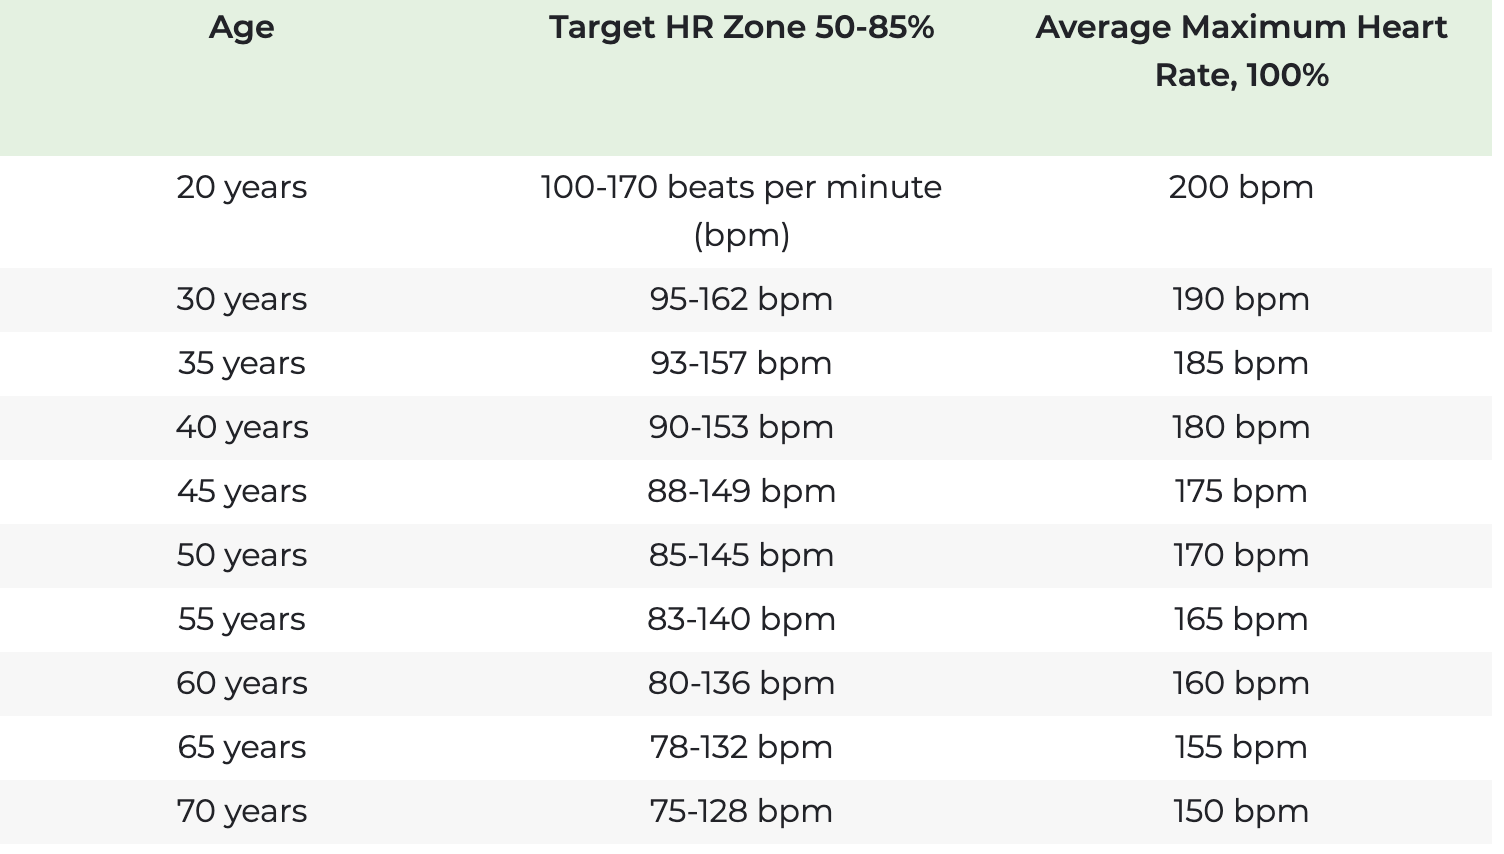

In [ ]:
data1.thalach.describe()

In [ ]:
colors = [ "#099441", "#B3000C"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.boxplot(x='target',y='thalach',data=data1)


In [ ]:
sns.regplot(x = data1['age'], y = data1['thalach'], data = data1) 
plt.title('Age VS Max Heart Rate')
#plt.xlabel(Age)
#plt.ylabel(Cholesterol)
plt.show()

Maximum Heart Reate decreases with age.

# OLDPEAK

ST depression induced by exercise relative to rest

In [ ]:
data1.oldpeak.describe()

In [ ]:
data1.oldpeak.value_counts()

In [ ]:
colors = [ "#099441", "#B3000C"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.boxplot(x='target',y='oldpeak',data=data1)


In [ ]:
sns.regplot(x = data1['age'], y = data1['oldpeak'], data = data1) 
plt.title('Age VS ST Depression induced')
#plt.xlabel(Age)
#plt.ylabel(Cholesterol)
plt.show()

Let's see how normal is our continuous data.

In [ ]:
continuous_data=data[['age', 'chol', 'trestbps', 'thalach', 'oldpeak']]

In [ ]:
#Visualize continuous data
continuous_data.hist(figsize=(12,10));

In [ ]:
continuous_data = continuous_data.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)

In [ ]:
continuous_data.hist(figsize=(12,10));

In [ ]:
#separate boolean data from initial dataset
boolean_data=data[['sex','exang', 'fbs']]

In [ ]:
#Check for correlations
all_data = pd.concat([continuous_data, categ_dummy_data, boolean_data, data['target']], axis=1)
all_data.corr()

In [ ]:
df_corr=all_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#drop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_corr.drop_duplicates(inplace=True)

In [ ]:
# Since a correlation of 1 happens only when data is identical we onlky need to separate correlation smaller than 1 and larger than 0.75.
df_corr[(df_corr.cc>.75) & (df_corr.cc <1)]

In [ ]:
corr = all_data.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

No strong correlations were found.

In [ ]:
#unite continuous, categorical and boolean data after creating dummies and normalizing into a new datafreame that will beour X.
#unify our results into one dataset.
X = pd.concat([continuous_data, categ_dummy_data, boolean_data], axis=1)
X.reset_index()
X.columns

In [ ]:
y = data['target']
y

In [ ]:
# Define Random State
seed = 20

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)



In [ ]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

In [ ]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [ ]:
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_hat_test  )
cf

In [ ]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

# Less False Negatives
We have 40 true positives, 3 false negatives, 7 false positives and 24 true negatives. Not bad for our first model.
We are interested in minimizing false negatives. If we get false positives doctors are going to investigate further and find out that these people are actually healty. On the other hand we don't want to get many false negatives, because a false negative mighte deter a doctor from oinvestigating further and the pacient might get worse without help. 
95.5% model

In [ ]:
Accuracy Metrics
We care the most about having a high true positive rate and a low false negative rate, therefore we will be optimizing our models for recall.

It's okay if we have some false positives, as the cost of aquiring customers is much higher than maintaining them. However we wouldn't want this rate to be too high, and thus be wasting efforts on customers who are unlikely to churn. So we will consider accuracy, however precision will not be as important of a metric as recall.

In [ ]:
from sklearn.metrics import roc_curve, auc
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [ ]:
print('AUC: {}'.format(auc(fpr, tpr)))

In [ ]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Baseline Models¶
Create a DataFrame that contains:

Our 3 initial classifiers
Class balanced training data (X & y)
Test data (X & y)
Then create a function to fit our models, make predictions, calculate the accuracy scores, and return everything in a DataFrame.

# Instantiate Classifiers

In [ ]:
# Splitting with X & y in np.array format for XGBoost
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X.values, 
                                                                    y.values, 
                                                                    test_size=0.30, 
                                                                    random_state=seed)

In [ ]:
### Instantiate Classifiers ###

# Bagging Tree
bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    random_state=seed)

# Random Forest
rnd_clf = RandomForestClassifier(random_state=seed)

# XGBoost 
xgb_clf = xgb.XGBClassifier(random_state=seed)

### Create Dictionary of Classifiers ###

clf_dict = {0:
    {'clf_name': 'Bagging Tree',
     'clfs': bag_clf,
     'X_train': X_train,
     'X_test': X_test,
     'y_train': y_train,
     'y_test': y_test},
            1:
    {'clf_name': 'Random Forest',
     'clfs': rnd_clf,
     'X_train': X_train,
     'X_test': X_test,
     'y_train': y_train_,
     'y_test': y_test},
            2:
    {'clf_name': 'XGBoost',
     'clfs': xgb_clf,
     'X_train': X_train_xgb,
     'X_test': X_test_xgb,
     'y_train': y_train_xgb,
     'y_test': y_test_xgb}}

### Convert into DataFrame ##

models_df = pd.DataFrame.from_dict(clf_dict, orient='index')